# Dataset Overview

provided with the following files:

### 1. **train.csv**
- **Description:** Contains 172 columns, including the target variable `churn_probability` (which indicates whether a customer will churn, where `0` means no churn and `1` means churn).
  
### 2. **test.csv**
- **Description:** Similar to `train.csv`, but it contains only the features (171 columns) and **does not include the target variable (`churn_probability`)**. This will be used for making predictions.

### 3. **sample.csv**
- **Description:** Provides the format for submitting your predictions. It contains the same `id` column as in `test.csv`, and you are expected to predict the `churn_probability` for each customer.

### 4. **data_dictionary.csv**
- **Description:** This file contains definitions for the variables used in the dataset, providing additional context on what each feature represents.

---

### Objective
The goal is to **predict `churn_probability`** (whether a customer will churn) based on the features provided in the dataset.



# 2. Initial Exploration and Preprocessing

Before building models, it's essential to first explore and preprocess the data to ensure it's in a suitable format for training.

### Step 1: **Load the Data**
Use **Pandas** to load the `train.csv` and `test.csv` files into DataFrames for initial exploration.

```python

In [1]:
import pandas as pd

# Load the train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Show basic info about the datasets
train_data.info()
test_data.info()

# Show first few rows of the train dataset
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


### Step 2: **Check for Missing Values**
It is crucial to check for missing values in both the `train` and `test` datasets, as they can negatively impact the performance of the model.

We can use Pandas' `isnull()` and `sum()` functions to identify the missing values in each column.


In [2]:
# Check missing values
train_data.isnull().sum()
test_data.isnull().sum()

id                    0
circle_id             0
loc_og_t2o_mou      316
std_og_t2o_mou      316
loc_ic_t2o_mou      316
                  ...  
fb_user_8         22078
aon                   0
aug_vbc_3g            0
jul_vbc_3g            0
jun_vbc_3g            0
Length: 171, dtype: int64

### Step 3: **Verify Data Types**
It's important to verify the data types of each column to ensure they are appropriate for the analysis. For instance, numerical columns should have numeric data types, while categorical columns should have object or category data types.

You can check the data types of each column using Pandas' `.dtypes` attribute.

In [3]:
# Check data types
train_data.dtypes
test_data.dtypes

id                  int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
fb_user_8         float64
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
Length: 171, dtype: object

### Step 4: **Handle Categorical Features**
If any columns in the dataset are categorical (e.g., `CIRCLE_ID`, `LOC`), it's important to encode them properly before feeding the data into a machine learning model. Machine learning algorithms generally require numerical inputs, so we need to convert categorical data into numerical form.

We can use encoding techniques such as **Label Encoding** or **One-Hot Encoding** depending on the nature of the categorical variable.

#### Example: One-Hot Encoding
For nominal categorical variables (e.g., `LOC`), **One-Hot Encoding** is commonly used. This technique creates a new binary column for each unique value in the categorical column.


In [4]:
# Example of encoding categorical variables
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)


### Step 5: **Feature Scaling**
Feature scaling is an essential step in preprocessing, especially when working with models like **Logistic Regression** or **Support Vector Machines (SVM)**, which are sensitive to the scale of input features. Normalizing or standardizing numeric features helps improve model performance by ensuring that all features contribute equally to the model.

There are two main approaches to scaling:
- **Normalization**: Scales the features to a range (usually 0 to 1).
- **Standardization**: Centers the data by subtracting the mean and scaling it to unit variance.

#### Example: Standardization (Recommended for most models)
Standardization is typically the preferred method for models like Logistic Regression, as it ensures that features with different scales (e.g., age vs. income) have a similar range.


In [8]:
from sklearn.preprocessing import StandardScaler

features_to_scale = train_data.select_dtypes(include=['float64', 'int64']).drop(columns=['churn_probability'], errors='ignore')
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(features_to_scale)

# Ensure the same columns are used for test data
test_features_to_scale = test_data[features_to_scale.columns]
test_data_scaled = scaler.transform(test_features_to_scale)

### Step 6: **Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying structure and patterns of the dataset. It involves summarizing the main characteristics of the data and visualizing it. This helps in identifying potential issues, such as imbalanced data, outliers, or missing values.

#### Target Variable Distribution: Churn Probability
To assess the balance of the target variable (`churn_probability`), we need to visualize its distribution. Imbalanced target variables can affect model performance, so it’s essential to check whether the target is skewed towards one class.


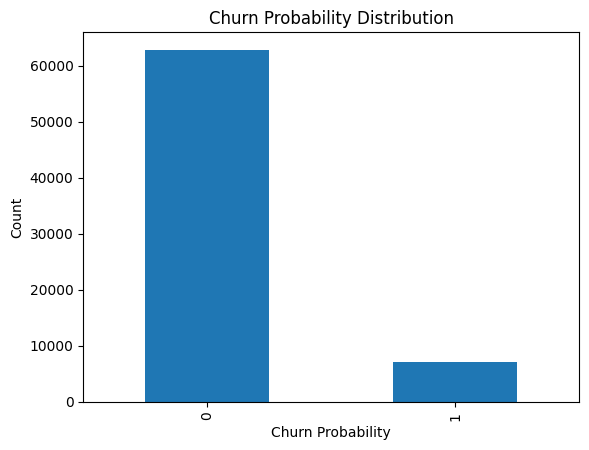

In [10]:
import matplotlib.pyplot as plt

train_data['churn_probability'].value_counts().plot(kind='bar')
plt.title('Churn Probability Distribution')
plt.xlabel('Churn Probability')
plt.ylabel('Count')
plt.show()

#### Correlation Between Features: Numeric Variables

Understanding the correlation between numeric features helps to identify relationships and potential multicollinearity issues in the data. Highly correlated features might indicate redundancy, which could affect model performance. We'll plot a correlation matrix to explore the relationships between numeric variables.


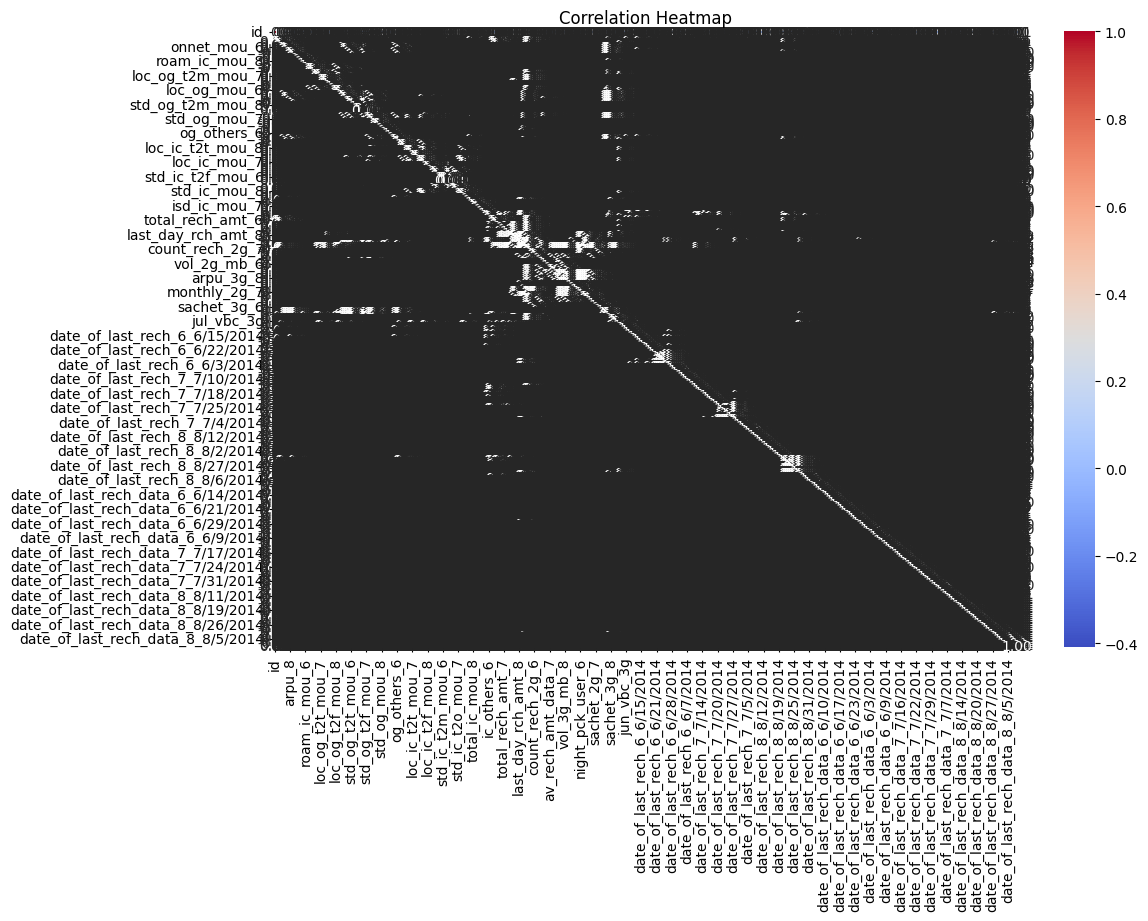

In [14]:
import seaborn as sns

correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Step 7: **Feature Engineering**

Feature Engineering is a critical step in building effective machine learning models. This step involves creating new features from the existing ones, handling class imbalances, and ensuring that the model can capture meaningful patterns from the data.

#### 1. **Create New Features**
To enhance the predictive power of the model, you can create new features by combining existing ones. For example, if the dataset has columns for **ARPU** (Average Revenue Per User) and **MOU** (Minutes of Use), you can create a new feature representing their ratio. Similarly, if there are columns for different types of charges or usage time, aggregating them might reveal more meaningful insights.


### Step 8: **Model Building**

Once the data is preprocessed and features are engineered, it's time to build and evaluate models. Start with simple models to establish a baseline for comparison, and then experiment with more advanced models.

#### 1. **Logistic Regression: Baseline Classifier**
Logistic Regression is a commonly used model for binary classification tasks. It's a good starting point to establish a baseline performance. We'll train the model and evaluate its performance using accuracy, precision, recall, and other metrics.

##### Model Training and Evaluation:

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Split data into features and target
X = train_data.drop(columns=['churn_probability', 'id'])
y = train_data['churn_probability']

# Handle missing values in the target column
y = y.fillna(0)  # Replace NaN with a default value (modify as per your dataset)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9325


#### 2. **Random Forest Classifier**: A Robust Ensemble Method
Random Forest is an ensemble learning method that aggregates multiple decision trees to improve performance and prevent overfitting. It's known to perform well in various classification problems, including churn prediction.

##### Model Training and Evaluation:

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_val)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

Random Forest Accuracy: 0.9437


### Step 9. **Model Evaluation**

### 1. Accuracy Score
Since **accuracy** is the evaluation metric for this competition, we will focus on improving this metric. Accuracy is the proportion of correct predictions made by the model out of all predictions. It is a simple and effective way to measure how well the model performs on the validation set.


In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')


Cross-validation scores: [0.94142857 0.94107143 0.94221429 0.94078571 0.94271019]
Mean CV score: 0.9416420387170511


### Step 10: **Prediction and Submission**

### 1. Generate Predictions
Once you've selected the best model based on evaluation metrics like accuracy and cross-validation, you can use it to generate predictions on the **test.csv** dataset. Since the test data does not contain the target variable (`churn_probability`), you will predict it using the trained model.

We will:

1. Load the **test.csv** dataset.
2. Preprocess the test data to match the format of the training data (e.g., handle missing values, scale features, and encode categorical variables).
3. Use the best-performing model to make predictions.
4. Create a **submission DataFrame** with `id` and the predicted `churn_probability`.


In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Convert to NumPy arrays if they are DataFrames
X_train = X_train.values  # Convert DataFrame to NumPy array
X_test = X_test.values

# Fit SimpleImputer on the NumPy array
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)  # This works without column names

# Transform X_test using the same imputer
X_test_imputed = imputer.transform(X_test)

# Now, you can scale the data if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Predict using your model
test_predictions = rf_model.predict(X_test_scaled)

# Prepare the submission DataFrame
submission = pd.DataFrame({'id': test_data['id'], 'churn_probability': test_predictions})

# Save the submission file
submission.to_csv('submission.csv', index=False)
